# Reuter News DataSet

In [36]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Loading the Reuters dataset

In [37]:
from keras.datasets import reuters

In [38]:
(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=10000)

In [39]:
print(len(train_data))
print(len(test_data))
print(len(train_labels))
print(len(test_labels))

8982
2246
8982
2246


In [40]:
print(train_data[10])

[1, 245, 273, 207, 156, 53, 74, 160, 26, 14, 46, 296, 26, 39, 74, 2979, 3554, 14, 46, 4689, 4329, 86, 61, 3499, 4795, 14, 61, 451, 4329, 17, 12]


## Decoding newswires back to text

In [41]:
word_index = reuters.get_word_index()
word_index

{'mdbl': 10996,
 'fawc': 16260,
 'degussa': 12089,
 'woods': 8803,
 'hanging': 13796,
 'localized': 20672,
 'sation': 20673,
 'chanthaburi': 20675,
 'refunding': 10997,
 'hermann': 8804,
 'passsengers': 20676,
 'stipulate': 20677,
 'heublein': 8352,
 'screaming': 20713,
 'tcby': 16261,
 'four': 185,
 'grains': 1642,
 'broiler': 20680,
 'wooden': 12090,
 'wednesday': 1220,
 'highveld': 13797,
 'duffour': 7593,
 '0053': 20681,
 'elections': 3914,
 '270': 2563,
 '271': 3551,
 '272': 5113,
 '273': 3552,
 '274': 3400,
 'rudman': 7975,
 '276': 3401,
 '277': 3478,
 '278': 3632,
 '279': 4309,
 'dormancy': 9381,
 'errors': 7247,
 'deferred': 3086,
 'sptnd': 20683,
 'cooking': 8805,
 'stratabit': 20684,
 'designing': 16262,
 'metalurgicos': 20685,
 'databank': 13798,
 '300er': 20686,
 'shocks': 20687,
 'nawg': 7972,
 'tnta': 20688,
 'perforations': 20689,
 'affiliates': 2891,
 '27p': 20690,
 'ching': 16263,
 'china': 595,
 'wagyu': 16264,
 'affiliated': 3189,
 'chino': 16265,
 'chinh': 16266,
 '

In [42]:
reversed_word_index = dict([(value, key) for (key, value) in word_index.items()])
reversed_word_index


{10996: 'mdbl',
 16260: 'fawc',
 12089: 'degussa',
 8803: 'woods',
 13796: 'hanging',
 20672: 'localized',
 20673: 'sation',
 20675: 'chanthaburi',
 10997: 'refunding',
 8804: 'hermann',
 20676: 'passsengers',
 20677: 'stipulate',
 8352: 'heublein',
 20713: 'screaming',
 16261: 'tcby',
 185: 'four',
 1642: 'grains',
 20680: 'broiler',
 12090: 'wooden',
 1220: 'wednesday',
 13797: 'highveld',
 7593: 'duffour',
 20681: '0053',
 3914: 'elections',
 2563: '270',
 3551: '271',
 5113: '272',
 3552: '273',
 3400: '274',
 7975: 'rudman',
 3401: '276',
 3478: '277',
 3632: '278',
 4309: '279',
 9381: 'dormancy',
 7247: 'errors',
 3086: 'deferred',
 20683: 'sptnd',
 8805: 'cooking',
 20684: 'stratabit',
 16262: 'designing',
 20685: 'metalurgicos',
 13798: 'databank',
 20686: '300er',
 20687: 'shocks',
 7972: 'nawg',
 20688: 'tnta',
 20689: 'perforations',
 2891: 'affiliates',
 20690: '27p',
 16263: 'ching',
 595: 'china',
 16264: 'wagyu',
 3189: 'affiliated',
 16265: 'chino',
 16266: 'chinh',
 2

In [43]:
# reversed_word_index.get()   # Return a reverse iterator over the values of the given sequence.
decoded_news = ' '.join([reversed_word_index.get(i - 3, '_') for i in train_data[0]])
decoded_news

'_ _ _ said as a result of its december acquisition of space co it expects earnings per share in 1987 of 1 15 to 1 30 dlrs per share up from 70 cts in 1986 the company said pretax net should rise to nine to 10 mln dlrs from six mln dlrs in 1986 and rental operation revenues to 19 to 22 mln dlrs from 12 5 mln dlrs it said cash flow per share this year should be 2 50 to three dlrs reuter 3'

In [44]:
train_labels[0]

3

## Encoding the data

In [45]:
def vectorize_sequences(sequences, dimentions = 10000):
    results = np.zeros((len(sequences), dimentions))
    for  i , sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results


In [84]:
x_train = vectorize_sequences(train_data)
x_train

array([[0., 1., 1., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 0.],
       ...,
       [0., 1., 1., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 0.]])

In [83]:
x_test = vectorize_sequences(test_data)
# y_train[0]
x_test

array([[0., 1., 1., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 0.],
       ...,
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 0.]])

#### One hot encode labels

In [48]:
def to_one_hot(labels, l_dimentions = 46):
    lresults = np.zeros((len(labels), l_dimentions))
    for i , label in enumerate(train_labels):
        lresults[i, label] = 1.
    return lresults

In [49]:
one_hot_train_lbls = to_one_hot(train_labels)
one_hot_train_lbls

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [50]:
# one_hot_test_lbls = to_one_hot(test_labels)

##### built-in way in Keras for one hot encoding

In [51]:
from keras.utils.np_utils import to_categorical
one_hot_train_labels = to_categorical(train_labels)
one_hot_test_labels = to_categorical(test_labels)

In [52]:
one_hot_test_labels
one_hot_train_labels

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

### Model definition

In [53]:
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

### Compiling the model

In [54]:
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

### Setting aside a validation set

In [55]:
x_val = x_train[:1000]
partial_x_train = x_train[1000:]

y_val = one_hot_train_labels[:1000]
partial_y_train = one_hot_train_labels[1000:]

In [56]:
# x_val

In [57]:
# y_val

### Training the model

In [63]:
model.fit(partial_x_train, partial_y_train, epochs=20, batch_size=512 , validation_data=(x_val, y_val))


Train on 7982 samples, validate on 1000 samples
Epoch 1/20
7982/7982 [==============================] - 1s 125us/step - loss: 0.1110 - accuracy: 0.9584 - val_loss: 1.1101 - val_accuracy: 0.8010
Epoch 2/20
7982/7982 [==============================] - 1s 124us/step - loss: 0.1103 - accuracy: 0.9563 - val_loss: 1.0586 - val_accuracy: 0.8100
Epoch 3/20
7982/7982 [==============================] - 1s 120us/step - loss: 0.1039 - accuracy: 0.9574 - val_loss: 1.0819 - val_accuracy: 0.8050
Epoch 4/20
7982/7982 [==============================] - 1s 118us/step - loss: 0.1080 - accuracy: 0.9569 - val_loss: 1.1427 - val_accuracy: 0.8000
Epoch 5/20
7982/7982 [==============================] - 1s 124us/step - loss: 0.1050 - accuracy: 0.9570 - val_loss: 1.1497 - val_accuracy: 0.8030
Epoch 6/20
7982/7982 [==============================] - 1s 122us/step - loss: 0.1027 - accuracy: 0.9570 - val_loss: 1.1506 - val_accuracy: 0.7990
Epoch 7/20
7982/7982 [==============================] - 1s 123us/step - loss

NameError: name 'history' is not defined

In [71]:
history = model.history.history
history.keys()

dict_keys(['val_loss', 'val_accuracy', 'loss', 'accuracy'])

### Plotting the training and validation loss

<function matplotlib.pyplot.show(*args, **kw)>

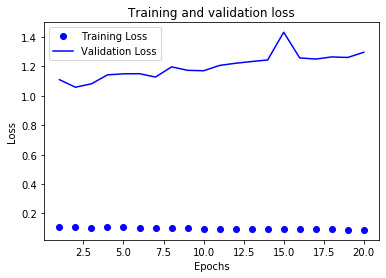

In [74]:
loss = history['loss']
val_loss = history['val_loss']

epochs = range(1, len(loss)+ 1)

plt.plot(epochs, loss, 'bo', label = 'Training Loss')
plt.plot(epochs, val_loss, 'b', label = 'Validation Loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')

plt.legend()
plt.show

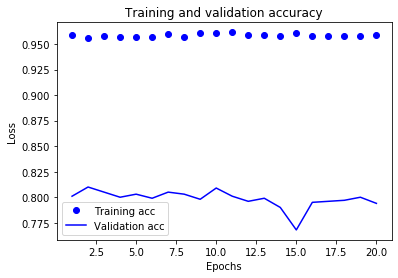

In [77]:
plt.clf()
acc = history['accuracy']
val_acc = history['val_accuracy']
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

### Retraining a model from scratch with less epochs

In [81]:
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

model.compile(optimizer='rmsprop',
loss='categorical_crossentropy',
metrics=['accuracy'])

model.fit(partial_x_train,
partial_y_train,
epochs=9,
batch_size=512,
validation_data=(x_val, y_val))

Train on 7982 samples, validate on 1000 samples
Epoch 1/9
7982/7982 [==============================] - 1s 137us/step - loss: 2.7153 - accuracy: 0.5112 - val_loss: 1.7849 - val_accuracy: 0.6500
Epoch 2/9
7982/7982 [==============================] - 1s 127us/step - loss: 1.4682 - accuracy: 0.7002 - val_loss: 1.3116 - val_accuracy: 0.7050
Epoch 3/9
7982/7982 [==============================] - 1s 153us/step - loss: 1.0822 - accuracy: 0.7769 - val_loss: 1.1474 - val_accuracy: 0.7480
Epoch 4/9
7982/7982 [==============================] - 1s 136us/step - loss: 0.8587 - accuracy: 0.8198 - val_loss: 1.0468 - val_accuracy: 0.7830
Epoch 5/9
7982/7982 [==============================] - 1s 122us/step - loss: 0.6909 - accuracy: 0.8552 - val_loss: 0.9721 - val_accuracy: 0.7950
Epoch 6/9
7982/7982 [==============================] - 1s 118us/step - loss: 0.5566 - accuracy: 0.8811 - val_loss: 0.9295 - val_accuracy: 0.8120
Epoch 7/9
7982/7982 [==============================] - 1s 116us/step - loss: 0.451

NameError: name 'x_test' is not defined

In [94]:
results = model.evaluate(x_test, one_hot_test_labels) #Returns the loss value & metrics values for the model in test mode.
results # LOSS EVALUATION ON TEST DATA

2246/2246 [==============================] - 0s 119us/step


[0.9955404944857209, 0.7885128855705261]

In [97]:
results_train = model.evaluate(x_train, one_hot_train_labels) # LOSS EVALUATION ON TRAINING DATA
results_train

8982/8982 [==============================] - 1s 112us/step


[0.3185556154757028, 0.9363170862197876]

#### random approach

In [111]:
import copy
test_labels_copy = copy.copy(test_labels)
np.random.shuffle(test_labels_copy)
hits_array = np.array(test_labels) == np.array(test_labels_copy)
float(np.sum(hits_array)) / len(test_labels) # probabilty of test labels

0.19056099732858414

In [112]:
# len(hits_array)

In [113]:
# test_labels_copy

In [114]:
# len(test_labels)

In [115]:
# np.sum(hits_array)

In [116]:
# float(np.sum(hits_array)) / len(test_labels)

### Generating predictions for new data

In [124]:
predictions = model.predict(x_test)
predictions

array([[3.60476733e-05, 1.90595365e-05, 5.40800420e-06, ...,
        1.19286315e-05, 1.76787198e-05, 1.87023284e-06],
       [4.75802226e-03, 2.85370380e-01, 8.07544624e-04, ...,
        1.05261710e-03, 1.48178856e-07, 2.10798735e-05],
       [1.05274224e-03, 7.59168863e-01, 1.85141852e-03, ...,
        9.65318410e-04, 1.30787676e-05, 7.94126900e-05],
       ...,
       [1.44868263e-05, 1.43968073e-05, 8.02833238e-05, ...,
        2.80823206e-05, 8.51136065e-05, 7.20002072e-06],
       [1.50826818e-03, 5.05812839e-02, 9.58811585e-03, ...,
        2.41952483e-03, 1.59316114e-04, 2.51999358e-04],
       [3.80176149e-04, 7.82517076e-01, 4.72726021e-03, ...,
        4.63241944e-04, 1.29655818e-05, 4.23130987e-05]], dtype=float32)

In [138]:
predictions[0]

array([3.60476733e-05, 1.90595365e-05, 5.40800420e-06, 8.04618955e-01,
       1.85152292e-01, 1.24354438e-06, 1.29937747e-04, 3.37696588e-06,
       1.47240655e-03, 5.35570916e-06, 1.04298939e-04, 8.82536580e-04,
       3.27744528e-05, 6.23872504e-04, 6.32783349e-06, 7.83370488e-05,
       2.06618872e-03, 8.78916908e-05, 7.21118777e-05, 1.99841408e-04,
       2.26129056e-03, 3.13731522e-04, 6.15944100e-06, 2.14348634e-04,
       2.91553602e-06, 1.58904168e-05, 1.80290954e-06, 1.24418264e-04,
       3.75835480e-05, 1.86665930e-05, 2.60398345e-04, 3.27628295e-05,
       7.46436262e-06, 4.98051231e-05, 5.80089327e-05, 1.96850669e-06,
       5.64804010e-04, 8.51815348e-05, 2.96653270e-05, 1.78462287e-04,
       1.61770677e-05, 8.54184254e-05, 3.26921486e-06, 1.19286315e-05,
       1.76787198e-05, 1.87023284e-06], dtype=float32)

In [130]:
np.ceil(np.sum(predictions[0]))

1.0

In [174]:
np.argmax(predictions[0])

3

In [172]:
# predicted = []
# for i in range(len(predictions)):
#     predicted.append(np.argmax(predictions[i]))
# predicted

In [173]:
# decoded_news = ' '.join([reversed_word_index.get(i - 3, '_') for i in predicted])
# list_of_predicted_words = decoded_news.split('_')
# np.unique(list_of_predicted_words)

# A model with an information bottleneck

In [175]:
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(4, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))
model.compile(optimizer='rmsprop',
loss='categorical_crossentropy',
metrics=['accuracy'])
model.fit(partial_x_train,
partial_y_train,
epochs=20,
batch_size=128,
validation_data=(x_val, y_val))

Train on 7982 samples, validate on 1000 samples
Epoch 1/20
7982/7982 [==============================] - 2s 251us/step - loss: 2.6657 - accuracy: 0.5118 - val_loss: 1.9449 - val_accuracy: 0.5530
Epoch 2/20
7982/7982 [==============================] - 2s 189us/step - loss: 1.7315 - accuracy: 0.5879 - val_loss: 1.6358 - val_accuracy: 0.6050
Epoch 3/20
7982/7982 [==============================] - 2s 191us/step - loss: 1.4846 - accuracy: 0.6224 - val_loss: 1.5593 - val_accuracy: 0.6140
Epoch 4/20
7982/7982 [==============================] - 1s 184us/step - loss: 1.3407 - accuracy: 0.6362 - val_loss: 1.5010 - val_accuracy: 0.6160
Epoch 5/20
7982/7982 [==============================] - 1s 180us/step - loss: 1.2327 - accuracy: 0.6600 - val_loss: 1.4736 - val_accuracy: 0.6420
Epoch 6/20
7982/7982 [==============================] - 1s 180us/step - loss: 1.1438 - accuracy: 0.7026 - val_loss: 1.4746 - val_accuracy: 0.6430
Epoch 7/20
7982/7982 [==============================] - 1s 181us/step - loss

### Further experiments

In [177]:
# Try using larger or smaller layers: 32 units, 128 units, and so on.
model = models.Sequential()
model.add(layers.Dense(32, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))
model.compile(optimizer='rmsprop',
loss='categorical_crossentropy',
metrics=['accuracy'])
model.fit(partial_x_train,
partial_y_train,
epochs=20,
batch_size=128,
validation_data=(x_val, y_val))

Train on 7982 samples, validate on 1000 samples
Epoch 1/20
7982/7982 [==============================] - 1s 175us/step - loss: 1.8141 - accuracy: 0.5963 - val_loss: 1.2792 - val_accuracy: 0.7070
Epoch 2/20
7982/7982 [==============================] - 1s 146us/step - loss: 1.0405 - accuracy: 0.7516 - val_loss: 1.1217 - val_accuracy: 0.7290
Epoch 3/20
7982/7982 [==============================] - 1s 148us/step - loss: 0.7138 - accuracy: 0.8355 - val_loss: 1.0648 - val_accuracy: 0.7840
Epoch 4/20
7982/7982 [==============================] - 1s 145us/step - loss: 0.4961 - accuracy: 0.8827 - val_loss: 1.0572 - val_accuracy: 0.8000
Epoch 5/20
7982/7982 [==============================] - 1s 141us/step - loss: 0.3642 - accuracy: 0.9137 - val_loss: 1.0280 - val_accuracy: 0.8030
Epoch 6/20
7982/7982 [==============================] - 1s 157us/step - loss: 0.2802 - accuracy: 0.9334 - val_loss: 1.1815 - val_accuracy: 0.7880
Epoch 7/20
7982/7982 [==============================] - 1s 140us/step - loss

In [178]:
# You used two hidden layers. Now try using a single hidden layer, or three hidden
# layers.
model = models.Sequential()
model.add(layers.Dense(32, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))
model.compile(optimizer='rmsprop',
loss='categorical_crossentropy',
metrics=['accuracy'])
model.fit(partial_x_train,
partial_y_train,
epochs=20,
batch_size=128,
validation_data=(x_val, y_val))

Train on 7982 samples, validate on 1000 samples
Epoch 1/20
7982/7982 [==============================] - 1s 177us/step - loss: 1.9681 - accuracy: 0.5289 - val_loss: 1.5171 - val_accuracy: 0.6600
Epoch 2/20
7982/7982 [==============================] - 1s 141us/step - loss: 1.2873 - accuracy: 0.6854 - val_loss: 1.3035 - val_accuracy: 0.6860
Epoch 3/20
7982/7982 [==============================] - 1s 152us/step - loss: 0.9823 - accuracy: 0.7618 - val_loss: 1.1889 - val_accuracy: 0.7310
Epoch 4/20
7982/7982 [==============================] - 1s 138us/step - loss: 0.7476 - accuracy: 0.8207 - val_loss: 1.1568 - val_accuracy: 0.7500
Epoch 5/20
7982/7982 [==============================] - 1s 139us/step - loss: 0.5665 - accuracy: 0.8596 - val_loss: 1.1740 - val_accuracy: 0.7770
Epoch 6/20
7982/7982 [==============================] - 1s 147us/step - loss: 0.4480 - accuracy: 0.8887 - val_loss: 1.2564 - val_accuracy: 0.7650
Epoch 7/20
7982/7982 [==============================] - 1s 147us/step - loss